In [1]:
#Import libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score
import numpy as np
%matplotlib inline

In [2]:
#Loading data
df=pd.read_csv("mortgage.csv")
print(df.shape)

(622489, 23)


In [3]:
#See the first 5 rows in the dataset
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [5]:
#Drop column "id"
df.drop(df.columns[[0]], axis=1, inplace=True)

In [7]:
df['status_time'].value_counts()

0    580742
2     26589
1     15158
Name: status_time, dtype: int64

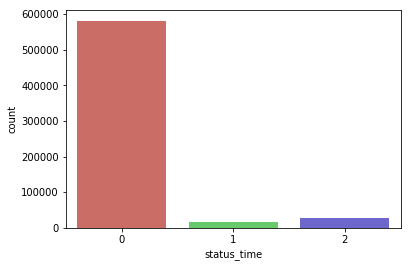

In [8]:
sns.countplot(x='status_time',data=df,palette='hls')

In [9]:
#Number of Null Values in columns.
df.isnull().sum()

time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

In [10]:
#Drop NA values
df.dropna(axis=0,inplace=True)

In [11]:
#check the Datatypes
df.dtypes

time                         int64
orig_time                    int64
first_time                   int64
mat_time                     int64
balance_time               float64
LTV_time                   float64
interest_rate_time         float64
hpi_time                   float64
gdp_time                   float64
uer_time                   float64
REtype_CO_orig_time          int64
REtype_PU_orig_time          int64
REtype_SF_orig_time          int64
investor_orig_time           int64
balance_orig_time          float64
FICO_orig_time               int64
LTV_orig_time              float64
Interest_Rate_orig_time    float64
hpi_orig_time              float64
default_time                 int64
payoff_time                  int64
status_time                  int64
dtype: object

In [12]:
#Splitting the data
from sklearn.model_selection import train_test_split

#X = df.iloc[:,1:22].values
#y = df.iloc[:,-1].values 
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 0)

X = df.loc[:,df.columns!='status_time']
y = df.loc[:,df.columns=='status_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
#Fitting the Logistic Model 
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
#Predicting the test set results
predictions=classifier.predict(X_test)

In [17]:
#Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[145121      5      2]
 [  3807      0      0]
 [  6620      0      0]]


In [19]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97    145128
          1       0.00      0.00      0.00      3807
          2       0.00      0.00      0.00      6620

avg / total       0.87      0.93      0.90    155555



In [20]:
accuracy_score(y_test,predictions)

0.9329240461573077

In [21]:
#K-FOLD cross validation with 10 folds.
from  sklearn  import  model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

10-fold cross validation average accuracy: 0.933
